### Basic Setup

In [1]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Source Data Processing

In [3]:
source = pd.read_excel('../input/trafficmoon/01043231301_20220603_143734_MANUAL_F278886244_Fav.xlsx', engine='openpyxl')

In [4]:
source_a = source.loc[:, ['TIME_STAMP', 'Smart Phone Smart Throughput Mobile Network Rx Byte']]
source_a.columns = ['time', 'volume_rx']
source_a

,time,volume_rx
0,2022-06-03 14:37:34.685,NaN
1,2022-06-03 14:37:34.685,NaN
2,2022-06-03 14:37:34.907,NaN
3,2022-06-03 14:37:34.907,NaN
4,2022-06-03 14:37:34.908,NaN
...,...,...
30343,2022-06-03 15:23:50.528,NaN
30344,2022-06-03 15:23:50.528,NaN
30345,2022-06-03 15:23:50.529,NaN
30346,2022-06-03 15:23:50.529,NaN


In [5]:
source_b = source_a[source_a['volume_rx'] > 0]
source_b

,time,volume_rx
8,2022-06-03 14:37:35,19777.0
18,2022-06-03 14:37:36,634.0
30,2022-06-03 14:37:37,2523.0
40,2022-06-03 14:37:38,6800.0
52,2022-06-03 14:37:39,2223.0
...,...,...
30283,2022-06-03 15:23:45,3988824.0
30293,2022-06-03 15:23:46,2050638.0
30305,2022-06-03 15:23:47,3654307.0
30315,2022-06-03 15:23:48,4922851.0


In [6]:
time_regular = pd.to_datetime(source_b['time'])
time_regular

8       2022-06-03 14:37:35
18      2022-06-03 14:37:36
30      2022-06-03 14:37:37
40      2022-06-03 14:37:38
52      2022-06-03 14:37:39
                ...        
30283   2022-06-03 15:23:45
30293   2022-06-03 15:23:46
30305   2022-06-03 15:23:47
30315   2022-06-03 15:23:48
30327   2022-06-03 15:23:49
Name: time, Length: 2460, dtype: datetime64[ns]

In [7]:
source_b.loc[:, ['time_regular']] = time_regular
source_b

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,time,volume_rx,time_regular
8,2022-06-03 14:37:35,19777.0,2022-06-03 14:37:35
18,2022-06-03 14:37:36,634.0,2022-06-03 14:37:36
30,2022-06-03 14:37:37,2523.0,2022-06-03 14:37:37
40,2022-06-03 14:37:38,6800.0,2022-06-03 14:37:38
52,2022-06-03 14:37:39,2223.0,2022-06-03 14:37:39
...,...,...,...
30283,2022-06-03 15:23:45,3988824.0,2022-06-03 15:23:45
30293,2022-06-03 15:23:46,2050638.0,2022-06-03 15:23:46
30305,2022-06-03 15:23:47,3654307.0,2022-06-03 15:23:47
30315,2022-06-03 15:23:48,4922851.0,2022-06-03 15:23:48


In [8]:
time_min = np.min(time_regular)
time_max = np.max(time_regular)

time_sequence = pd.date_range(time_min, time_max, freq='S')
time_sequence_df = pd.DataFrame(time_sequence, columns=['time_regular'])
time_sequence_df

,time_regular
0,2022-06-03 14:37:35
1,2022-06-03 14:37:36
2,2022-06-03 14:37:37
3,2022-06-03 14:37:38
4,2022-06-03 14:37:39
...,...
2770,2022-06-03 15:23:45
2771,2022-06-03 15:23:46
2772,2022-06-03 15:23:47
2773,2022-06-03 15:23:48


In [9]:
source_c = pd.merge(source_b, time_sequence_df, how='outer', on='time_regular')
source_d = source_c.sort_values(by=['time_regular']).reset_index(drop=True)
source_d

,time,volume_rx,time_regular
0,2022-06-03 14:37:35,19777.0,2022-06-03 14:37:35
1,2022-06-03 14:37:36,634.0,2022-06-03 14:37:36
2,2022-06-03 14:37:37,2523.0,2022-06-03 14:37:37
3,2022-06-03 14:37:38,6800.0,2022-06-03 14:37:38
4,2022-06-03 14:37:39,2223.0,2022-06-03 14:37:39
...,...,...,...
2770,2022-06-03 15:23:45,3988824.0,2022-06-03 15:23:45
2771,2022-06-03 15:23:46,2050638.0,2022-06-03 15:23:46
2772,2022-06-03 15:23:47,3654307.0,2022-06-03 15:23:47
2773,2022-06-03 15:23:48,4922851.0,2022-06-03 15:23:48


In [10]:
source_e = source_d.loc[:, ['time_regular', 'volume_rx']]
source_e.columns = ['time', 'volume_rx']
source_e

,time,volume_rx
0,2022-06-03 14:37:35,19777.0
1,2022-06-03 14:37:36,634.0
2,2022-06-03 14:37:37,2523.0
3,2022-06-03 14:37:38,6800.0
4,2022-06-03 14:37:39,2223.0
...,...,...
2770,2022-06-03 15:23:45,3988824.0
2771,2022-06-03 15:23:46,2050638.0
2772,2022-06-03 15:23:47,3654307.0
2773,2022-06-03 15:23:48,4922851.0


In [11]:
source_e.loc[:, ['volume_rx_log']] = np.log10(source_e['volume_rx'])
source_e

,time,volume_rx,volume_rx_log
0,2022-06-03 14:37:35,19777.0,4.296160
1,2022-06-03 14:37:36,634.0,2.802089
2,2022-06-03 14:37:37,2523.0,3.401917
3,2022-06-03 14:37:38,6800.0,3.832509
4,2022-06-03 14:37:39,2223.0,3.346939
...,...,...,...
2770,2022-06-03 15:23:45,3988824.0,6.600845
2771,2022-06-03 15:23:46,2050638.0,6.311889
2772,2022-06-03 15:23:47,3654307.0,6.562805
2773,2022-06-03 15:23:48,4922851.0,6.692217


In [12]:
print('# of NaN before replacement:', sum(np.isnan(source_e['volume_rx_log'])))
source_e['volume_rx_log'] = source_e['volume_rx_log'].fillna(0)
print('# of NaN after replacement:', sum(np.isnan(source_e['volume_rx_log'])))
source_e

# of NaN before replacement: 315
# of NaN after replacement: 0


,time,volume_rx,volume_rx_log
0,2022-06-03 14:37:35,19777.0,4.296160
1,2022-06-03 14:37:36,634.0,2.802089
2,2022-06-03 14:37:37,2523.0,3.401917
3,2022-06-03 14:37:38,6800.0,3.832509
4,2022-06-03 14:37:39,2223.0,3.346939
...,...,...,...
2770,2022-06-03 15:23:45,3988824.0,6.600845
2771,2022-06-03 15:23:46,2050638.0,6.311889
2772,2022-06-03 15:23:47,3654307.0,6.562805
2773,2022-06-03 15:23:48,4922851.0,6.692217


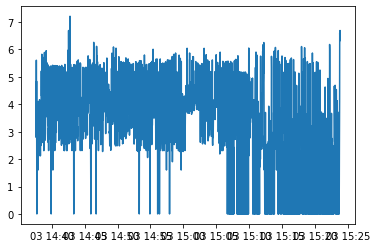

In [13]:
plt.plot(source_e['time'], source_e['volume_rx_log'])

In [14]:
source_e.loc[:, 'on_rx'] = 0
source_e.loc[source_e['volume_rx'] > 0, 'on_rx'] = 1
print('# of zeros:', sum(source_e["on_rx"] == 0))
source_e

# of zeros: 315


,time,volume_rx,volume_rx_log,on_rx
0,2022-06-03 14:37:35,19777.0,4.296160,1
1,2022-06-03 14:37:36,634.0,2.802089,1
2,2022-06-03 14:37:37,2523.0,3.401917,1
3,2022-06-03 14:37:38,6800.0,3.832509,1
4,2022-06-03 14:37:39,2223.0,3.346939,1
...,...,...,...,...
2770,2022-06-03 15:23:45,3988824.0,6.600845,1
2771,2022-06-03 15:23:46,2050638.0,6.311889,1
2772,2022-06-03 15:23:47,3654307.0,6.562805,1
2773,2022-06-03 15:23:48,4922851.0,6.692217,1


In [15]:
source_complete = source_e.loc[:, ['volume_rx_log']]
# source_complete = source_e.loc[:, ['volume_rx_log', 'on_rx']]
source_complete

,volume_rx_log
0,4.296160
1,2.802089
2,3.401917
3,3.832509
4,3.346939
...,...
2770,6.600845
2771,6.311889
2772,6.562805
2773,6.692217


### Input Data Processing

In [16]:
df = source_complete
df

,volume_rx_log
0,4.296160
1,2.802089
2,3.401917
3,3.832509
4,3.346939
...,...
2770,6.600845
2771,6.311889
2772,6.562805
2773,6.692217


In [17]:
label_column_index = [0] # from zero
df_length = df.shape[0]
num_features = df.shape[1]

ratio_train = 0.7
ratio_train_val = 0.9

df_train = df[0:int(df_length*ratio_train)]
df_val = df[int(df_length*ratio_train):int(df_length*ratio_train_val)]
df_test = df[int(df_length*ratio_train_val):]

num_batch = 32
num_epoch = 100

performance_val = {}
perfirmacne_test = {}

### Function for Dataset Generation

In [18]:
def split_data(data):
    input = data[:, input_slice, :]
    label = data[:, label_slice, :]
    label = tf.stack([label[:, :, i] for i in label_column_index], axis=-1)
    input.set_shape([None, input_length, None])
    label.set_shape([None, label_length, None])
    return input, label

def make_dataset(data):
    data = np.array(data, dtype=np.float32)
    data_window = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=input_length+label_length,
        sequence_stride=1,
        sampling_rate=1,
        batch_size=num_batch,
        shuffle=False
    )
    data_window_split = data_window.map(split_data)
    return data_window_split

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

### (1) Many to One / Convolutional

In [19]:
input_length = 20
label_length = 1

input_slice = slice(0, input_length)
label_slice = slice(input_length, input_length+label_length)

model_conv = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(input_length, ),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)    
])

model_conv.compile(loss=tf.losses.MeanAbsoluteError(),
                   optimizer=tf.optimizers.Adam(),
                   metrics=[tf.metrics.MeanAbsoluteError()])

model_conv_history = model_conv.fit(make_dataset(df_train),
                                    epochs=num_epoch,
                                    validation_data=make_dataset(df_val),
                                    callbacks=[early_stopping])

model_conv_predict = model_conv.predict(make_dataset(df_test))
model_conv_predict_1d = model_conv_predict.reshape(model_conv_predict.shape[0])

2022-07-26 05:26:48.435859: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-26 05:26:48.723499: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
61/61 [==============================] - 1s 10ms/step - loss: 1.0751 - mean_absolute_error: 1.0751 - val_loss: 1.3542 - val_mean_absolute_error: 1.3542
Epoch 2/100
61/61 [==============================] - 0s 5ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - val_loss: 1.3144 - val_mean_absolute_error: 1.3144
Epoch 3/100
61/61 [==============================] - 0s 5ms/step - loss: 0.7358 - mean_absolute_error: 0.7358 - val_loss: 1.2683 - val_mean_absolute_error: 1.2683
Epoch 4/100
61/61 [==============================] - 0s 5ms/step - loss: 0.7250 - mean_absolute_error: 0.7250 - val_loss: 1.2484 - val_mean_absolute_error: 1.2484
Epoch 5/100
61/61 [==============================] - 0s 5ms/step - loss: 0.7246 - mean_absolute_error: 0.7246 - val_loss: 1.2216 - val_mean_absolute_error: 1.2216
Epoch 6/100
61/61 [==============================] - 0s 5ms/step - loss: 0.7181 - mean_absolute_error: 0.7181 - val_loss: 1.2179 - val_mean_absolute_error: 1.2179
Epoch 7/100
61/61 [==

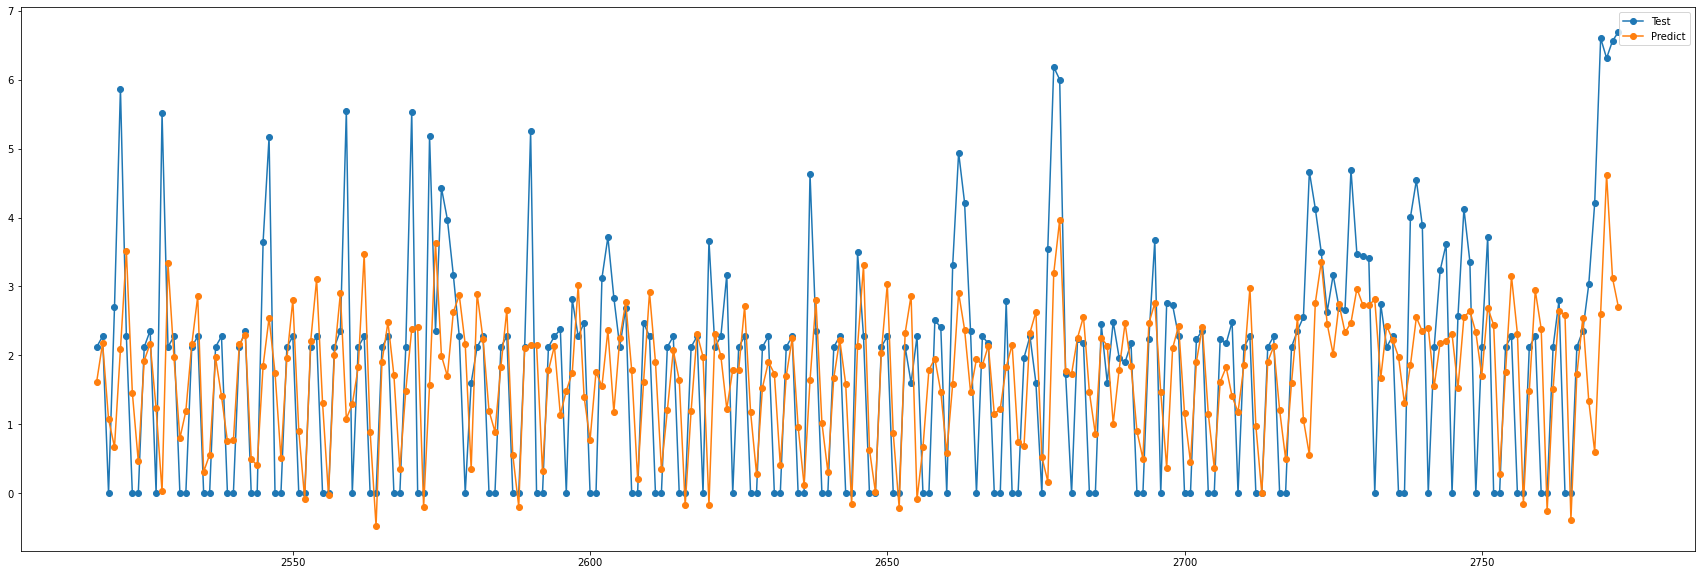

In [20]:
num_samples = len(df_test) - input_length - 1

plt.figure(figsize=(30, 10))

plt.plot(df_test.index[input_length:input_length+num_samples],
         df_test.iloc[input_length:input_length+num_samples, label_column_index],
         label='Test', marker='o')

plt.plot(df_test.index[input_length:input_length+num_samples],
         model_conv_predict_1d[:num_samples],
         label='Predict', marker='o')

plt.legend()

### (2) Many to One / LSTM

In [21]:
input_length = 20
label_length = 1

input_slice = slice(0, input_length)
label_slice = slice(input_length, input_length+label_length)

model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(loss=tf.losses.MeanAbsoluteError(),
                   optimizer=tf.optimizers.Adam(),
                   metrics=[tf.metrics.MeanAbsoluteError()])

model_lstm_history = model_lstm.fit(make_dataset(df_train),
                                    epochs=num_epoch,
                                    validation_data=make_dataset(df_val),
                                    callbacks=[early_stopping])

model_lstm_predict = model_lstm.predict(make_dataset(df_test))
model_lstm_predict_1d = model_lstm_predict.reshape(model_lstm_predict.shape[0])

Epoch 1/100
61/61 [==============================] - 5s 37ms/step - loss: 1.0416 - mean_absolute_error: 1.0416 - val_loss: 1.3161 - val_mean_absolute_error: 1.3161
Epoch 2/100
61/61 [==============================] - 1s 24ms/step - loss: 0.8781 - mean_absolute_error: 0.8781 - val_loss: 1.4037 - val_mean_absolute_error: 1.4037
Epoch 3/100
61/61 [==============================] - 2s 26ms/step - loss: 0.8448 - mean_absolute_error: 0.8448 - val_loss: 1.3402 - val_mean_absolute_error: 1.3402


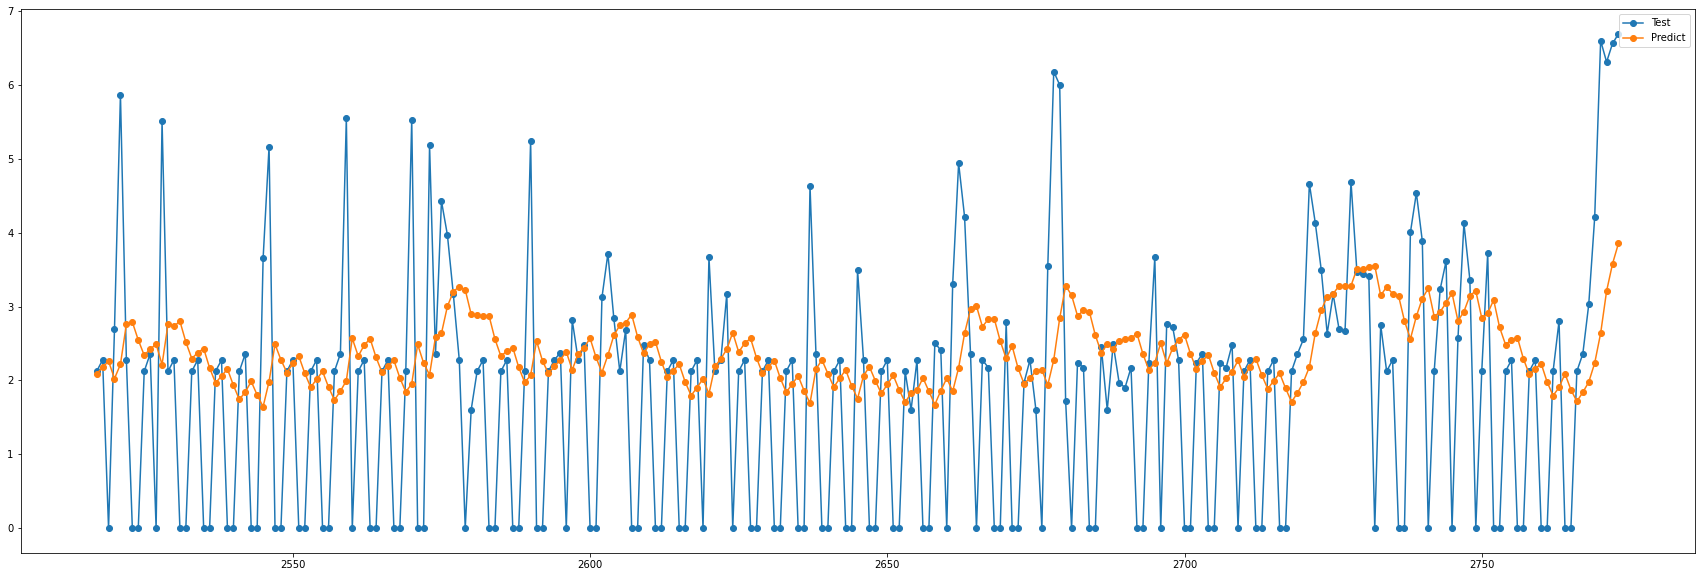

In [22]:
num_samples = len(df_test) - input_length - 1

plt.figure(figsize=(30, 10))

plt.plot(df_test.index[input_length:input_length+num_samples],
         df_test.iloc[input_length:input_length+num_samples, label_column_index],
         label='Test', marker='o')

plt.plot(df_test.index[input_length:input_length+num_samples],
         model_lstm_predict_1d[:num_samples],
         label='Predict', marker='o')

plt.legend()

### (3) Test